# Problem Set 02 - Root Finding and Optimization

Computational Methods in Economics, FGV-EESP

Student: Vinícius de Almeida Nery Ferreira

Professor: Lucas Finamor

TA: Arthur Botinha

*AI Use*: I used ChatGPT to solve coding errors and help with Julia syntax. I did not prompt it to solve any question. In VS Code, I also used Copilot to speed up the coding process with its suggestions.

In [2]:
using Plots
using PyFormattedStrings  # Python f-strings

using Roots
using NLopt
using ForwardDiff # automatic, not numeric differentiation

In [3]:
# Will need to set seed, as we will use stochastic optimization methods
NLopt.srand(121019);

# Question 1

We are interested in finding the root of the function

$f(x) = x^3 - 14x^2 + 55x - 10$

We wil start with the points $(4, f(4))$ and $(6, f(6))$.

## (a) Bracket the root

To bracket the root, we need to find an interval $[a, b]$ such that $f(a)f(b) < 0$.

In [4]:
# First, let's define our function
func_question1 = x -> x^3 - 14x^2 + 55x - 10;

In [5]:
# Then, let's evaluate the given points
f"f(4) = {func_question1(4)}, f(6) = {func_question1(6)}"

"f(4) = 50, f(6) = 32"

We see that the function at both points is positive, and so we don't bracket. Cheating a little bit, we can visualize the function graphically:

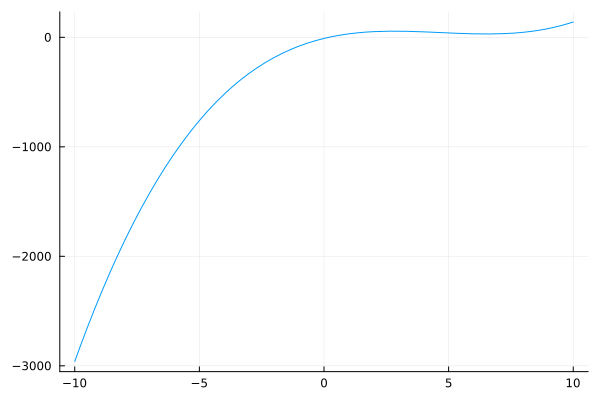

In [6]:
plot(x -> func_question1(x), -10, 10, legend = false)

Then, we can easily bracket the function:

In [7]:
f"f(0) = {func_question1(0)}, f(4) = {func_question1(4)}"

"f(0) = -10, f(4) = 50"

## (b) Bisection method

We will set an (absolute) tolerance of $\varepsilon = 10^{-8}$.

For the bisection implementation, we use the `Roots` package.

In [8]:
# Setting tolerance
abs_tol_q1 = 10e-8

# Finding zero
root_bisection_q1 = find_zero(func_question1, (0, 4), Bisection(), atol=abs_tol_q1, verbose=true);

Results of univariate zero finding:

* Converged to: 0.19097520401555812
* Algorithm: Bisection()
* iterations: 33
* function evaluations ≈ 36
* stopped as |f(x_n)| ≤ max(δ, |x|⋅ϵ) using δ = atol, ϵ = rtol

Trace:
(a₀, b₀) = ( 2.237502219360062e-154, 4 )
(a₁, b₁) = ( 3.0226589942830556e-77, 4 )
(a₂, b₂) = ( 1.1020259538958945e-38, 4 )
(a₃, b₃) = ( 2.1006417091906648e-19, 4 )
(a₄, b₄) = ( 9.1677065938711166e-10, 4 )
(a₅, b₅) = ( 6.0558319091796875e-05, 4 )
(a₆, b₆) = ( 0.01556396484375, 4 )
(a₇, b₇) = ( 0.01556396484375, 0.24951171875 )
(a₈, b₈) = ( 0.06231689453125, 0.24951171875 )
(a₉, b₉) = ( 0.12469482421875, 0.24951171875 )
(a₁₀, b₁₀) = ( 0.18695068359375, 0.24951171875 )
(a₁₁, b₁₁) = ( 0.18695068359375, 0.218231201171875 )
(a₁₂, b₁₂) = ( 0.18695068359375, 0.2025909423828125 )
(a₁₃, b₁₃) = ( 0.18695068359375, 0.19477081298828125 )
(a₁₄, b₁₄) = ( 0.19086074829101562, 0.19477081298828125 )
(a₁₅, b₁₅) = ( 0.19086074829101562, 0.19281578063964844 )
(a₁₆, b₁₆) = ( 0.19086074829101562, 0

We've found a root of $0.1909$ using the bisection method, which took 33 iterations to converge.

In [9]:
# Sanity check
func_question1(root_bisection_q1)

-2.1221916668423546e-8

## (c) Secant method

The initial guess will be the midpoint of our previous interval $[0, 4]$, so we set $x_0 = 2$.

In [10]:
# Finding zero using the Secant()
root_secant_q1 = find_zero(func_question1, 2, Secant(), atol=abs_tol_q1, verbose=true);

Results of univariate zero finding:

* Converged to: 0.19097520444226923
* Algorithm: Secant()
* iterations: 9
* function evaluations ≈ 11
* stopped as |f(x_n)| ≤ max(δ, |x|⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x₁ = 2.0000060555277894,	 fx₁ = 52.000066610512334
x₂ = 2,	 fx₂ = 52
x₃ = -2.727293545943966,	 fx₃ = -284.42093040413579
x₄ = 1.2693104317445751,	 fx₄ = 39.301036333479509
x₅ = 0.78410802265079937,	 fx₅ = 25.000475290956963
x₆ = -0.064130784455611267,	 fx₆ = -13.585035504632815
x₇ = 0.23451381226863538,	 fx₇ = 2.1412029731277151
x₈ = 0.19385191468144164,	 fx₈ = 0.14304007666247287
x₉ = 0.19094110047384985,	 fx₉ = -0.001697100993784062
x₁₀ = 0.1909752309285431,	 fx₁₀ = 1.318024962060349e-06
x₁₁ = 0.19097520444226923,	 fx₁₁ = 1.212718814258551e-11



We've found a root of $0.1909$ using the secant method, which is the same value as the bisection. However, it was faster, with only 9 iterations to converge (less than 1/3 of the number of iterations in the bisection!).

## (d) Newton-Raphson method

In [11]:
# Let's compute the analytical derivative
dfunc_question1 = x -> 3x^2 - 28x + 55;

In [12]:
# And solve using Newton's method
root_newton_q1 = find_zero((func_question1, dfunc_question1), 2, Roots.Newton(), verbose=true);

Results of univariate zero finding:

* Converged to: 0.1909752044420255
* Algorithm: Roots.Newton()
* iterations: 7
* function evaluations ≈ 14
* stopped as f(x_n) = 0

Trace:
x₁ = 2,	 fx₁ = 52
x₂ = -2.7272727272727275,	 fx₂ = -284.41773102930131
x₃ = -0.87653083673519294,	 fx₃ = -69.638928499702388
x₄ = -0.025696195909440167,	 fx₄ = -11.422551864854663
x₅ = 0.17929751601621713,	 fx₅ = -0.58293902391092089
x₆ = 0.19093857592607516,	 fx₆ = -0.0018227302126252454
x₇ = 0.19097520408002011,	 fx₇ = -1.801415194790934e-08
x₈ = 0.19097520444202551,	 fx₈ = 0



We found the same root as the two previous methods, but this time we only needed 7 iterations to converge.
As expected, Newton's method is faster in this simpler, polynomial case, as we can use information on the function's derivative.
Moreover, we can use the analytical, and not numerical, derivative, which speeds up the process.

The secant method has a similar performance, as it approximates the slope of the function by the secant line. The bisection method is the slowest, as it does not use any information on the function's slope.

# Question 2

Our goal is to minimze the function

$f(x) = x \cdot \sin \left( \frac{x^2}{3} \right)$

in the interval $[0, 10]$.

In [13]:
# Defining the function
func_question2 = x -> x * sin(x^2 / 3);

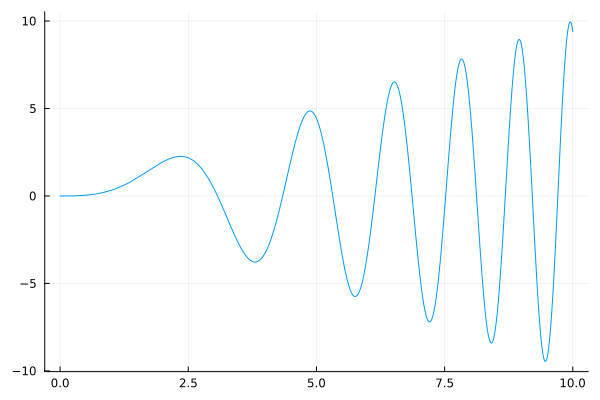

In [14]:
# Plotting it
plot(func_question2, 0, 10, legend = false)

## (a) Optimization Methods

We will use the following optimization methods, trying to compare different optimization strategies:

1. Nelder-Mead's Method: a local, derivative-free method (`:LN_NELDERMEAD` in NLopt).
2. BFGS: a local, derivative-based method (`:LD_LBFGS` in NLopt).
3. Controlled Random Cearch (CRS): a global, stochastic method (`:GN_CRS2_LM` in NLopt).

In [15]:
# Setting the tolerance, which will be the same for relative and absolute
tol_q2a = 10e-4
starting_point_q2a = 0.0;
interval_q2 = (0.0, 10.0);

In [16]:
# To use NLopt, we have to redefine our function to allow for vectors
# See https://github.com/jump-dev/NLopt.jl for details.
function func_question2_nlopt(x::Vector)
    return x[1] * sin(x[1]^2 / 3)
end;

### Nelder-Mead's Method

In [17]:
# Creating object: optimization_method, number of variables
# See https://nlopt.readthedocs.io/en/latest/NLopt_Algorithms/ for a list of algorithms.
opt_q2a_nelder = NLopt.Opt(:LN_NELDERMEAD, 1)

# Interval (have to use ! to modify the object)
NLopt.lower_bounds!(opt_q2a_nelder, [interval_q2[1]])
NLopt.upper_bounds!(opt_q2a_nelder, [interval_q2[2]])

# Setting the tolerance
NLopt.ftol_rel!(opt_q2a_nelder, tol_q2a)
NLopt.ftol_abs!(opt_q2a_nelder, tol_q2a)

In [19]:
# Minimizing
NLopt.min_objective!(opt_q2a_nelder, (x, g) -> func_question2_nlopt(x))
NLopt.optimize(opt_q2a_nelder, [starting_point_q2a])

(0.0, [0.0], :XTOL_REACHED)

We see that Nelder-Mead indeed found a local minimum, but it is not global.

### BFGS

It will be useful to create a function to solve an unconstrained optimization method in an interval

In [24]:
function solve_unconstrained_nlopt(func, starting_point, interval, tol_f, method; number_variables=1, diff=nothing)
    # Object
    opt = NLopt.Opt(method, number_variables)

    # Interval (have to use ! to modify the object)
    NLopt.lower_bounds!(opt, [interval[1]])
    NLopt.upper_bounds!(opt, [interval[2]])

    # Setting the tolerance
    NLopt.ftol_rel!(opt, tol_f)
    NLopt.ftol_abs!(opt, tol_f)

    # Minimizing
    ## Differentiating (if necessary)
    if diff == nothing
        NLopt.min_objective!(opt, (x, g) -> func(x))
    else
        NLopt.min_objective!(opt, diff(func))
    end

    ## Optimization
    min_f, min_x, ret = NLopt.optimize(opt, starting_point)
    
    return min_f, min_x, ret, NLopt.numevals(opt)
end;

In [25]:
# To optimize using BFGS, we need a derivative (1D gradient in this case).
# Will use a automatic/numerical derivative for a change, following the example in https://github.com/jump-dev/NLopt.jl
function autodiff(f::Function)
    function nlopt_fn(x::Vector, grad::Vector)
        if length(grad) > 0
            # Use ForwardDiff to compute the gradient. Replace with your
            # favorite Julia automatic differentiation package.
            ForwardDiff.gradient!(grad, f, x)
        end
        return f(x)
    end
end;

In [26]:
# Solving using BFGS
solve_unconstrained_nlopt(func_question2_nlopt, [starting_point_q2a], interval_q2, tol_q2a, :LD_LBFGS, diff=autodiff)

(0.0, [0.0], :SUCCESS, 1)

As with the Nelder-Mead, the BFGS found a local minimum, but it is not global.
At the starting point of 0 we are considering, this is specially bad, since the derivative at the point is zero as well, and so we just had one function evaluation.

### CRS

In [27]:
# Solving using CRS
solve_unconstrained_nlopt(func_question2_nlopt, [starting_point_q2a], interval_q2, tol_q2a, :GN_CRS2_LM)

(-9.459629469993702, [9.460353187396148], :FTOL_REACHED, 76)

Contrary to the two local algorithms, the CRS found the global minimum (or at least came really close to it).
Note that, as it is random, it not always converges to the same value, even though we have setted the `NLopt.srand`.

This is because we have a initial population of $N = 10(N+1) = 20$ points, and so we may have initial outpoints whose convex set does not contain the global minimum.

## (b) Different Starting Points

We saw in the plot that the function has different local minima depending on the interval; Nelder-Mead and BFGS will be sensitive to it.

In [28]:
for point in 0:1:10
    min_f_nm, min_x_nm, _, num_eval_nm = solve_unconstrained_nlopt(func_question2_nlopt, [point], interval_q2, tol_q2a, :LN_NELDERMEAD)
    min_f_bfgs, min_x_bfgs, _, num_eval_bfgs = solve_unconstrained_nlopt(func_question2_nlopt, [point], interval_q2, tol_q2a, :LD_LBFGS, diff=autodiff)
    min_f_crs, min_x_crs, _, num_eval_crs = solve_unconstrained_nlopt(func_question2_nlopt, [point], interval_q2, tol_q2a, :GN_CRS2_LM)

    println(
        """
        Starting point: $point
        Nelder-Mead: x = $(round.(min_x_nm, digits=2)), f(x) = $(round.(min_f_nm, digits=2)), function evaluations = $num_eval_nm
        BFGS: x = $(round.(min_x_bfgs, digits=2)), f(x) = $(round.(min_f_bfgs, digits=2)), function evaluations = $num_eval_bfgs
        CRS: x = $(round.(min_x_crs, digits=2)), f(x) = $(round.(min_f_crs, digits=2)), function evaluations = $num_eval_crs
        """
    )
end

Starting point: 0
Nelder-Mead: x = [0.0], f(x) = 0.0, function evaluations = 2
BFGS: x = [0.0], f(x) = 0.0, function evaluations = 1
CRS: x = [9.46], f(x) = -9.46, function evaluations = 128

Starting point: 1
Nelder-Mead: x = [0.0], f(x) = 0.0, function evaluations = 4
BFGS: x = [0.0], f(x) = 0.0, function evaluations = 4
CRS: x = [7.2], f(x) = -7.2, function evaluations = 121

Starting point: 2
Nelder-Mead: x = [3.8], f(x) = -3.78, function evaluations = 16
BFGS: x = [0.05], f(x) = 0.0, function evaluations = 6
CRS: x = [5.76], f(x) = -5.75, function evaluations = 109

Starting point: 3
Nelder-Mead: x = [5.77], f(x) = -5.74, function evaluations = 15
BFGS: x = [7.21], f(x) = -7.2, function evaluations = 12
CRS: x = [9.46], f(x) = -9.46, function evaluations = 134

Starting point: 4
Nelder-Mead: x = [3.8], f(x) = -3.78, function evaluations = 18
BFGS: x = [3.8], f(x) = -3.78, function evaluations = 6
CRS: x = [9.46], f(x) = -9.46, function evaluations = 112

Starting point: 5
Nelder-M

We see that, if we choose starting points closer to the true global minimum, the local methods will find it.
However, they are very sensitive to this starting point, find local minimum more often than not.

On the contrary, CRS performs better, as it is a global method, finding the global minimum regardless of the starting point. This comes at the cost of more function evaluations.


## (c) Lower Tolerance

In [29]:
tol_q2c = 10e-8

for point in 0:1:10
    min_f_nm, min_x_nm, _, num_eval_nm = solve_unconstrained_nlopt(func_question2_nlopt, [point], interval_q2, tol_q2c, :LN_NELDERMEAD)
    min_f_bfgs, min_x_bfgs, _, num_eval_bfgs = solve_unconstrained_nlopt(func_question2_nlopt, [point], interval_q2, tol_q2c, :LD_LBFGS, diff=autodiff)
    min_f_crs, min_x_crs, _, num_eval_crs = solve_unconstrained_nlopt(func_question2_nlopt, [point], interval_q2, tol_q2c, :GN_CRS2_LM)

    println(
        """
        Starting point: $point
        Nelder-Mead: x = $(round.(min_x_nm, digits=2)), f(x) = $(round.(min_f_nm, digits=2)), function evaluations = $num_eval_nm
        BFGS: x = $(round.(min_x_bfgs, digits=2)), f(x) = $(round.(min_f_bfgs, digits=2)), function evaluations = $num_eval_bfgs
        CRS: x = $(round.(min_x_crs, digits=2)), f(x) = $(round.(min_f_crs, digits=2)), function evaluations = $num_eval_crs
        """
    )
end

Starting point: 0
Nelder-Mead: x = [0.0], f(x) = 0.0, function evaluations = 2
BFGS: x = [0.0], f(x) = 0.0, function evaluations = 1
CRS: x = [9.46], f(x) = -9.46, function evaluations = 212

Starting point: 1
Nelder-Mead: x = [0.0], f(x) = 0.0, function evaluations = 4
BFGS: x = [0.0], f(x) = 0.0, function evaluations = 4
CRS: x = [9.46], f(x) = -9.46, function evaluations = 327

Starting point: 2
Nelder-Mead: x = [3.8], f(x) = -3.78, function evaluations = 28
BFGS: x = [0.0], f(x) = 0.0, function evaluations = 13
CRS: x = [9.46], f(x) = -9.46, function evaluations = 324

Starting point: 3
Nelder-Mead: x = [5.76], f(x) = -5.75, function evaluations = 31
BFGS: x = [7.21], f(x) = -7.2, function evaluations = 13
CRS: x = [9.46], f(x) = -9.46, function evaluations = 193

Starting point: 4
Nelder-Mead: x = [3.8], f(x) = -3.78, function evaluations = 32
BFGS: x = [3.8], f(x) = -3.78, function evaluations = 8
CRS: x = [9.46], f(x) = -9.46, function evaluations = 229

Starting point: 5
Nelder

Conclusions are similar to the previous case, but we see that the CRS method is more robust to the tolerance level, as it is a global method.
However, the number of evaluations increases, as the tolerance is lower.

## Bonus: Refinement

As we saw in class, it is often better to perform a global optimization first and then use a local method starting from the point found by the global method.

In [31]:
# Finding the minimum with CRS and starting point of 5
min_f_crs, min_x_crs, _, _ = solve_unconstrained_nlopt(func_question2_nlopt, [5], interval_q2, tol_q2c, :GN_CRS2_LM);

# Refining with BFGS
min_f_bfgs, min_x_bfgs, _, _ = solve_unconstrained_nlopt(func_question2_nlopt, [min_x_crs[1]], interval_q2, tol_q2c, :LD_LBFGS, diff=autodiff);

# Comparing
println(
    """
    CRS: x = $(round.(min_x_crs, digits=6)), f(x) = $(round.(min_f_crs, digits=6))
    BFGS, starting from CRS point: x = $(round.(min_x_bfgs, digits=6)), f(x) = $(round.(min_f_bfgs, digits=6))
    Diff. BFGS-CRS: x = $(min_x_bfgs - min_x_crs), f(x) = $(min_f_bfgs - min_f_crs)
    """
)

CRS: x = [9.464975], f(x) = -9.463641
BFGS, starting from CRS point: x = [9.464968], f(x) = -9.463641
Diff. BFGS-CRS: x = [-7.237457127828861e-6], f(x) = -9.876924167429024e-9



We see a *slight* improvement, with BFGS finding a lower value than CRS when starting in the point found by the latter.

# Question 3

We have the following function with four unknowns:

$$
f(x_1, x_2; \theta) = \theta_1 x_1 + \frac{\theta_2}{1 + \exp(-\theta_3 x_2)} + \theta_4 x_1^{x_2}.
$$

We are given four values:

\begin{aligned}
f(1,1; \theta_0) &= y_1 = 35.8 \\
f(2,4; \theta_0) &= y_2 = 547.6 \\
f(-1,2; \theta_0) &= y_3 = 32.2 \\
f(2,-2; \theta_0) &= y_4 = 14.5
\end{aligned}


Our goal is to find the true $\theta_0$. We know that $\theta = (\theta_1, \theta_2, \theta_3, \theta_4) \in \mathbb{R}^4$.


In [32]:
# Creating the function
function func_question3(x::Vector, θ::Vector{Float64})
    return θ[1]x[1] + θ[2] / (1 + exp(-θ[3]x[2])) + θ[4]x[1]^x[2]
end;

## (a) Quadratic Differences

In [33]:
# We have some known function values at the true value of θ:
data_points_q3 = Dict(
    [1.0, 1.0]   => 35.8,
    [2.0, 4.0]   => 547.6,
    [-1.0, 2.0]  => 32.2,
    [2.0, -2.0]  => 14.5
);

Note that we have four data points and four parameters, so our problem is just-identified.

Let's define our loss function that we want to minimize with respect to $\theta$:

In [34]:
function g_q3(data_points_q3::Dict, θ::Vector{Float64})
    # Using list comprehension to calculate the sum of squared errors
    return sum([(func_question3(x, θ) - y)^2 for (x, y) in data_points_q3])
end;

## (b) $g(\theta_1), \theta_1 = [0, 0, 0, 0]$

In [35]:
# Defining guess
θ1 = [0.0, 0.0, 0.0, 0.0]

# Calling function
g_θ1 = g_q3(data_points_q3, θ1)

# Printing
f"g(θ1) = {round(g_θ1, digits=2)}"

"g(θ1) = 302394.49"

## (c), (e) Minimizing the Loss Function

To minimize the function, we can't use our defined function `solve_unconstrained_nlopt` directly because the objective function has parameters.
Moreover, we need to print iterations, and will follow the *trace* tutorial in the [documentation](https://github.com/jump-dev/NLopt.jl).

We will use the global method CRS.

In [36]:
# Modifying to allow for traceback
function g_q3_trace(data_points_q3::Dict, θ::Vector{Float64})
    # Using list comprehension to calculate the sum of squared errors
    value = sum([(func_question3(x, θ) - y)^2 for (x, y) in data_points_q3])

    # Traceback: push!(m,y) stores into m a reference to the array y, instead of copying the contents: need to use copy().
    push!(trace, (copy(θ), value));

    # Returning
    return value
end;

Since our problem is just-identified, we can achieve a solution of exactly zero, so tolerances need to be low.

In [40]:
# Trace object
trace = Any[]

# Object: method-number of variables
N_q3 = length(θ1)
opt_q3 = NLopt.Opt(:GN_CRS2_LM, N_q3)

# Don't have an interval a priori, so will not set lower and upper bounds
# However, CRS needs intervals! Will experiment and see
bound_crs = 2000
NLopt.lower_bounds!(opt_q3, -bound_crs)
NLopt.upper_bounds!(opt_q3, bound_crs)

# Will set small tolerance, as the function needs to be 0
tol_q3 = 10e-16
NLopt.ftol_abs!(opt_q3, tol_q3)

# Maximum number of evaluations
maxeval!(opt_q3, 200_000)

# Initial population: defalt is 10(N + 1)
population!(opt_q3, 10 * 10 * (N_q3 + 1))

# Minimizing: need to specify that we want θ
NLopt.min_objective!(opt_q3, (θ, grad) -> g_q3_trace(data_points_q3, θ))

## Optimization, with θ1 as starting point
min_g, min_θ, ret_θ = NLopt.optimize(opt_q3, θ1)
num_eval_θ = NLopt.numevals(opt_q3)

# Printing
println(
    """
    Starting point: $θ1, with function value: $(round(g_θ1, digits = 2))
    Minimum value: $min_g
    θ: $(round.(min_θ, digits=2))
    Status: $ret_θ
    Number of evaluations: $num_eval_θ
    """
)

Starting point: [0.0, 0.0, 0.0, 0.0], with function value: 302394.49
Minimum value: 1.0169145597307604e-15
θ: [1.8, 2.4, -1585.4, 34.0]
Status: FTOL_REACHED
Number of evaluations: 36775



In [41]:
# Let's now use a local algorithm to refine the solution. Will use a variant of Nelder-Mead called Subplex
opt_q3_local = NLopt.Opt(:LN_SBPLX, N_q3)

# Will set 0 tolerance, as the function needs to be 0 as we are in the just-identified case
tol_q3_local = 0
NLopt.ftol_abs!(opt_q3, tol_q3_local)
NLopt.ftol_rel!(opt_q3, tol_q3_local)

# Maximum number of evaluations
maxeval!(opt_q3_local, 200_000)

# Minimizing: need to specify that we want θ
NLopt.min_objective!(opt_q3_local, (θ, grad) -> g_q3_trace(data_points_q3, θ))

## Optimization, with min_θ as starting point
min_g_local, min_θ_local, ret_θ_local = NLopt.optimize(opt_q3_local, min_θ)
num_eval_θ_local = NLopt.numevals(opt_q3_local)

# Printing
println(
    """
    Starting point: $(round.(min_θ, digits=2)), with function value: $min_g
    Minimum value: $min_g_local
    θ: $(round.(min_θ_local, digits=2))
    Status: $ret_θ_local
    Number of local evaluations: $num_eval_θ_local
    Number of total evaluations: $(num_eval_θ_local + num_eval_θ)
    """
)

Starting point: [1.8, 2.4, -1585.4, 34.0], with function value: 1.0169145597307604e-15
Minimum value: 4.952082287776923e-19
θ: [1.8, 2.4, -1700.51, 34.0]
Status: XTOL_REACHED
Number of local evaluations: 2604
Number of total evaluations: 39379



The above output has our result. Notice that we are able to improve slightly the minimization of the function.

Due to the randomness of CRS (even with a seed), we may have different results across runs.
Moreover, even if the number of iterations/evaluations is large, the `NLopt` implementation is very fast, running in under half a second.

## (d) Algorithm History

In [42]:
# Separating points from the local and global optimization
global_trace = trace[1:num_eval_θ]
local_trace  = trace[num_eval_θ+1:end];

In [43]:
# Plots can become too heavy, so will keep 1 in 10 points
global_trace = global_trace[1:10:end]
local_trace = local_trace[1:10:end];

# Add the final point
push!(local_trace, (min_θ_local, min_g_local));

Let's first plot the function values across iterations.
Here and in the next plot, we plot in identity and in normal scale.

*Note*: tried to plot in scatter form as in the example in Lecture 4, but the Notebook became gigantic. Will go with line plots instead.

In [44]:
# Create iteration numbers for each method
global_iters = 1:length(global_trace)
local_iters  = (length(global_trace) + 1):(length(global_trace) + length(local_trace))

# Extract function values for each method
global_f_vals = [t[2] for t in global_trace]
local_f_vals  = [t[2] for t in local_trace];

In [45]:
# Layout of plot
l = @layout [a; b]
plots_list = []

# Normal scale
## Global
p = plot(global_iters, global_f_vals, lw=2, label="Global", ylabel="g(θ)")

## Local
plot!(local_iters, local_f_vals, lw=2, label="Local")

## Final point
scatter!([length(global_iters) + length(local_iters)], [min_g_local], label="Final point", ms = 3, mc = :red)

push!(plots_list, p)

# Log scale
## Global
p_log = plot(global_iters, global_f_vals, lw=2, label="Global", xlabel="Iteration (1 in 10)", ylabel="g(θ) (log10 scale)", yscale=:log10, legend=false)

## Local
plot!(local_iters, local_f_vals, lw=2, label="Local")

## Final point
scatter!([length(global_iters) + length(local_iters)], [min_g_local], label="Final Point", ms = 3, mc = :red)

push!(plots_list, p_log);

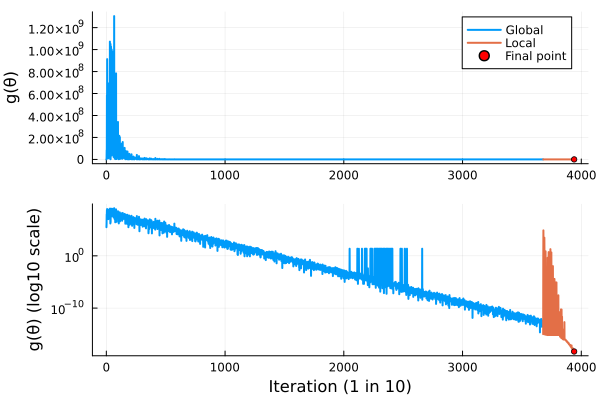

In [46]:
plot(plots_list..., layout = l) #... "splats" (splits?) the list into individual arguments

Now, let's plot the function value across each parameter value.

In [47]:
# Vector to hold each parameter's plot
plots_list_theta = []

for i in 1:4
    # Extract the i-th parameter and function values from the global
    ## For each element in the vector, [1] selects the theta values and i the index
    global_theta_i = [t[1][i] for t in global_trace]
    
    # Extract the i-th parameter values and function values for the local phase
    local_theta_i = [t[1][i] for t in local_trace]

    ## Global
    p = plot(global_iters, global_theta_i, lw=2, label="Global", xlabel = "Iteration (1 in 10)", ylabel="\$\\theta_$i\$", title="\$\\theta_$i\$")

    ## Local
    plot!(local_iters, local_theta_i, lw=2, label="Local")

    ## Final point
    scatter!([length(global_iters) + length(local_iters)], [min_g_local], label="Final point", ms = 3, mc = :red)

    push!(plots_list_theta, p)
end

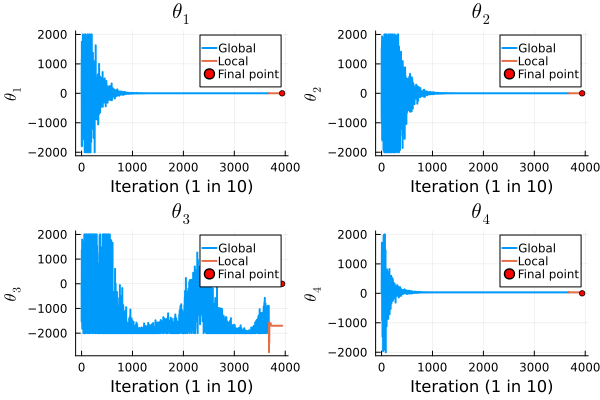

In [48]:
l = @layout [a b ; c d]
plot(plots_list_theta..., layout = l) #... "splats" (splits?) the list into individual arguments

We see that all parameters converged, expect for $\theta_3$. We see that it was constrained by the bound we imposed of -2000; however, even when changing the bounds to arbitrary values, it still was constrained.
Moreover, the local optimization method was also very erratic. 

### Sensibility

A common thing to do in this case is fix $\theta_i$, $i \neq 3$ and see how the loss function behaves.
This way, we can see how sensible or stable the minimum we found is.

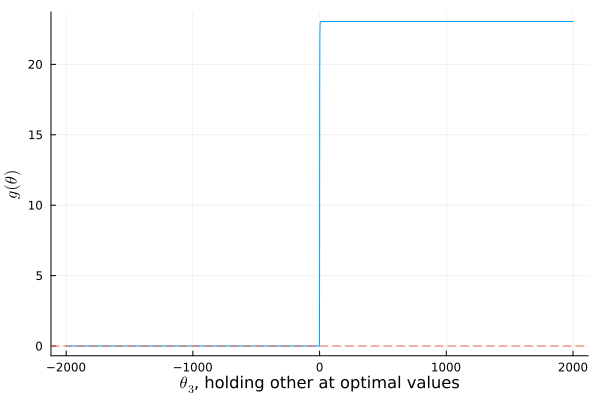

In [49]:
plot(θ3 -> g_q3(data_points_q3, [min_θ_local[1], min_θ_local[2], θ3, min_θ_local[4]]), -2000, 2000, xlabel="\$\\theta_3\$, holding other at optimal values", ylabel="\$g(\\theta)\$", legend=false)
hline!([0], ls = :dash, label="y = 0")

We see that the function appers to be totally unsensentitive to any value of $\theta_3 < 0$ (actually, a little bit more negative than that; a plot of negative values smaller than -50 throws an error).
Thus, any value of $\theta_3$ that is negative enough will minimize our function due to numerical precision.

# Question 4

We are interested in computing the Pareto Frontier, i.e., the allocation of goods that maximizes the social utility from the planner's perspective. There are $N$ individuals and $k = 1,2,\dots,K$ goods. The utility of individual $i$ is given by:

$$
u_i(x) = \sum_{k=1}^{K} \frac{\alpha_k^i (x_k^i)^{1-\sigma_k^i}}{1 - \sigma_k^i},
$$

where $\alpha_k^i > 0$, $\sigma_k^i > 1$, and $x_k^i \geq 0$ is the amount of good $k$ that individual $i$ consumes.

The social planner problem is given by:

$$
\max_{\{x^1, x^2, \dots, x^N\}} \sum_{i=1}^{N} \lambda_i u_i(x^i) \quad \text{s.t.} \quad \sum_{i=1}^{N} x_k^i \leq \sum_{i=1}^{N} e_k^i, \quad \forall k,
$$

where $\lambda_i > 0$ is the weight of individual $i$ and $e_k^i$ is the endowment of good $k$ of individual $i$.

## (a) Function of the Social Planner

In [50]:
# Utility function
function utility_q4(xi; α, σ)
    return sum(α .* xi.^(1 .- σ) ./ (1 .- σ))
end;

In [51]:
# Creating the planner's problem; will make all variables other than the allocation as keyword arguments

"""
Solves the unconstrained planner's problem. This is a helper function to be passed onto a solver, which should containt the constraints.

# Arguments
- `x`: N × K vector of allocations. Ordered in N and then in K, as in the question (Julia handles reshape by default the other way, so this was painful; see https://discourse.julialang.org/t/should-reshape-have-an-option-for-row-major-order/6929).
- `λ`: N vector of weights to individuals.
- `e`: N × K vector of endowments. Ordered in N and then in K.
- `α`: N × K vector of utility weights to goods. Ordered in N and then in K.
- `σ`: N × K vector of risk aversion parameter. Ordered in N and then in K.
- N: number of individuals.
- K: number of goods.
"""
function unconstrained_problem_planner(x; λ, e, α, σ, N, K)    
    # Reshaping into matrices: each row is an individual
    x_mat = transpose(reshape(x, K, N))
    e_mat = transpose(reshape(e, K, N))
    α_mat = transpose(reshape(α, K, N))
    σ_mat = transpose(reshape(σ, K, N))

    # Vector of utilities
    u = zeros(N)

    # Calculating utility for each individual
    for i in 1:N
        u[i] = utility_q4(x_mat[i, :]; α = α_mat[i, :], σ = σ_mat[i, :])
    end

    # Returning the sum
    value = sum(λ .* u)

    # Traceback: push!(m,y) stores into m a reference to the array y, instead of copying the contents: need to use copy().
    push!(trace_planner, (copy(x), value))

    return value
end;

In [52]:
"""
Creates the planner's constraint, which should be valid for all goods k.

# Arguments
- `x`: N × K vector of allocations. Ordered in N and then in K.
- `e`: N × K vector of endowments. Ordered in N and then in K.
- N: number of individuals.
- K: number of goods.
"""
function planner_constraint(x, e, N, K)
    # Reshaping into matrices: each row is an individual
    x_mat = transpose(reshape(x, K, N))
    e_mat = transpose(reshape(e, K, N))

    # Sum of allocations for each good (second dimension of the N × K matrices)
    # We sum over the first dimension, and thus get a K-dimensional vector
    x_total = sum(x_mat, dims=1)
    e_total = sum(e_mat, dims=1)

    return x_total .- e_total  # should be less than or equal to 0
end;

In [53]:
"""
Creates the planner's constraint for a specific good k.

# Arguments
- `xk`: N × 1 vector of allocations. Ordered in N and then in K.
- `ek`: N × 1 vector of endowments. Ordered in N and then in K.
"""
function planner_constraint_one_good(xk, ek)
    return sum(xk) .- sum(ek)  # should be less than or equal to 0
end;

In [54]:
"""
Solves the (constrained) planner's problem using NLopt.
# Arguments
- `λ`: N vector of weights to individuals.
- `e`: N × K vector of endowments. Ordered in N and then in K.
- `α`: N × K vector of utility weights to goods. Ordered in N and then in K.
- `σ`: N × K vector of risk aversion parameter. Ordered in N and then in K.
- N: number of individuals.
- K: number of goods.
- method: which solver to use. Default to Powell's method.
- tol: tolerance for the optimization (absolute and relative for the function).
- max_eval: maximum number of function evaluations.
"""
function solve_planner_problem(; λ, e, α, σ, N, K, method=:LN_COBYLA, tol=10e-8, max_eval=100_000)
    # Optimization object
    opt = NLopt.Opt(method, N * K)

    # Reshaping e
    e_mat = transpose(reshape(e, K, N))

    # Setting the bounds: 0 as the lower, the maximum sum of endowments as upper
    NLopt.lower_bounds!(opt, 0)
    NLopt.upper_bounds!(opt, maximum(sum(e_mat, dims=1)))

    # Setting the tolerance
    # NLopt.ftol_abs!(opt, tol)
    # NLopt.ftol_rel!(opt, tol)

    # Maximum number of evaluations
    maxeval!(opt, max_eval)

    # Setting inequality constraints, which should be <= 0
    # There is a way to make it vector-valued, but I got confused
    for k in 1:K
        NLopt.inequality_constraint!(opt, (x, grad) -> planner_constraint_one_good(transpose(reshape(x, K, N))[:, k], e_mat[:, k]), tol)
    end

    # Minimizing
    NLopt.min_objective!(opt, (x, grad) -> -unconstrained_problem_planner(x; λ=λ, e=e, α=α, σ=σ, N=N, K=K))

    min_f, min_x, ret = NLopt.optimize(opt, e)
    num_eval = NLopt.numevals(opt)
    
    return min_f, transpose(reshape(min_x, K, N)), ret, num_eval
end;

## (b) Solving the Social Planner Problem

In [55]:
# Parameters
N = 2
K = 2

# Individuals give opposite weights to goods for all goods
α = [
    1.0, 2.0,
    2.0, 1.0
]

# Individuals have the same risk aversion parameter
σ = [2.0, 2.0, 2.0, 2.0]

# Individuals have the same endowments
e = [
    3.0, 3.0, 
    3.0, 3.0
];

In [56]:
# Weights
λ1 = [.25, .75]
λ2 = [.5, .5]
λ3 = [.75, .25]
λ4 = [1.0, 0.0];

In [57]:
# Optimizing
## Trace object
trace_planner = Any[]

## Optimization
min_f_λ1, min_x_λ1, ret_λ1, num_eval_λ1 = solve_planner_problem(λ=λ1, e=e, α=α, σ=σ, N=N, K=K)

## Copying trace
trace_planner_λ1 = copy(trace_planner)

# Success?
ret_λ1

:ROUNDOFF_LIMITED

In [58]:
# Optimizing
## Trace object
trace_planner = Any[]

## Optimization
min_f_λ2, min_x_λ2, ret_λ2, num_eval_λ2 = solve_planner_problem(λ=λ2, e=e, α=α, σ=σ, N=N, K=K)

## Copying trace
trace_planner_λ2 = copy(trace_planner)

# Success?
ret_λ2

:ROUNDOFF_LIMITED

In [59]:
# Optimizing
## Trace object
trace_planner = Any[]

## Optimization
min_f_λ3, min_x_λ3, ret_λ3, num_eval_λ3 = solve_planner_problem(λ=λ3, e=e, α=α, σ=σ, N=N, K=K)

## Copying trace
trace_planner_λ3 = copy(trace_planner)

# Success?
ret_λ3

:ROUNDOFF_LIMITED

In [60]:
# Optimizing
## Trace object
trace_planner = Any[]

## Optimization
min_f_λ4, min_x_λ4, ret_λ4, num_eval_λ4 = solve_planner_problem(λ=λ4, e=e, α=α, σ=σ, N=N, K=K)

## Copying trace
trace_planner_λ4 = copy(trace_planner)

# Success?
ret_λ4

:ROUNDOFF_LIMITED

In [61]:
# Printing results
println(
    """
    λs should be read first-to-second row, not column.
    
    λ : $λ1
    x¹: $(round.(min_x_λ1[1, :], digits=2))
    x²: $(round.(min_x_λ1[2, :], digits=2))
    
    λ : $λ2
    x¹: $(round.(min_x_λ2[1, :], digits=2))
    x²: $(round.(min_x_λ2[2, :], digits=2))

    λ : $λ3
    x¹: $(round.(min_x_λ3[1, :], digits=2))
    x²: $(round.(min_x_λ3[2, :], digits=2))

    λ : $λ4
    x¹: $(round.(min_x_λ4[1, :], digits=2))
    x²: $(round.(min_x_λ4[2, :], digits=2))
    """
)

λs should be read first-to-second row, not column.

λ : [0.25, 0.75]
x¹: [1.74, 2.7]
x²: [4.26, 3.3]

λ : [0.5, 0.5]
x¹: [2.49, 3.51]
x²: [3.51, 2.49]

λ : [0.75, 0.25]
x¹: [3.3, 4.26]
x²: [2.7, 1.74]

λ : [1.0, 0.0]
x¹: [6.0, 6.0]
x²: [0.0, 0.0]



The results make sense: first, $\lambda_1$ and $\lambda_3$ have symmetrical results, which is expected given our parameter inputs.

Furthermore, when given equal weights, the allocations of individuals are flipped, as they value goods differently.

Finally, when all weight is given to one individual, the planner allocates all goods to that individual.

## (c) Bigger Economy

In [62]:
# Parameters
N_c = 6
K_c = 3

# Individuals give opposite weights to goods
α_c = [
    1.0, 2.0, 3.0,
    1.0, 3.0, 2.0,
    2.0, 1.0, 3.0,
    2.0, 3.0, 1.0,
    3.0, 1.0, 2.0,
    3.0, 2.0, 1.0
]

# Individuals have the same risk aversion parameter for all goods
σ_c = repeat([2.0], N_c * K_c)

# Individuals have the same endowments
e_c = repeat([3.0], N_c * K_c);

In [63]:
# Weights: only equal weights to simply
λ_c = repeat([1/6], N_c);

In [64]:
# Optimizing
## Trace object
trace_planner = Any[]

## Optimization
min_f_λ_c, min_x_λ_c, ret_λ_c, num_eval_λ_c = solve_planner_problem(λ=λ_c, e=e_c, α=α_c, σ=σ_c, N=N_c, K=K_c)

## Copying trace
trace_planner_λ_c = copy(trace_planner)

# Success?
ret_λ_c

:ROUNDOFF_LIMITED

In [65]:
# Comparing with baseline case of λ2
println(
    """
    λ : $λ2; N: $N, K: $K
    α¹: $(round.(α[1:2], digits=2)); x¹: $(round.(min_x_λ2[1, :], digits=2))
    α²: $(round.(α[3:4], digits=2)); x²: $(round.(min_x_λ2[2, :], digits=2))
    Number of evaluations: $num_eval_λ2

    λ : $(round.(λ_c, digits=2)); N: $N_c, K: $K_c
    α¹: $(round.(α_c[1:3], digits=2)); x¹: $(round.(min_x_λ_c[1, :], digits=2))
    α²: $(round.(α_c[4:6], digits=2)); x²: $(round.(min_x_λ_c[2, :], digits=2))
    α³: $(round.(α_c[7:9], digits=2)); x³: $(round.(min_x_λ_c[3, :], digits=2))
    α⁴: $(round.(α_c[10:12], digits=2)); x⁴: $(round.(min_x_λ_c[4, :], digits=2))
    α⁵: $(round.(α_c[13:15], digits=2)); x⁵: $(round.(min_x_λ_c[5, :], digits=2))
    α⁶: $(round.(α_c[16:18], digits=2)); x⁶: $(round.(min_x_λ_c[6, :], digits=2))
    Number of evaluations: $num_eval_λ_c
    """
)

λ : [0.5, 0.5]; N: 2, K: 2
α¹: [1.0, 2.0]; x¹: [2.49, 3.51]
α²: [2.0, 1.0]; x²: [3.51, 2.49]
Number of evaluations: 2086

λ : [0.17, 0.17, 0.17, 0.17, 0.17, 0.17]; N: 6, K: 3
α¹: [1.0, 2.0, 3.0]; x¹: [2.17, 3.07, 3.76]
α²: [1.0, 3.0, 2.0]; x²: [2.17, 3.76, 3.07]
α³: [2.0, 1.0, 3.0]; x³: [3.07, 2.17, 3.76]
α⁴: [2.0, 3.0, 1.0]; x⁴: [3.07, 3.76, 2.17]
α⁵: [3.0, 1.0, 2.0]; x⁵: [3.76, 2.17, 3.07]
α⁶: [3.0, 2.0, 1.0]; x⁶: [3.76, 3.07, 2.17]
Number of evaluations: 7357



Since the dimensionality of the problem is higher, our algorithm takes longer to converge. The results are consistent with the previous case and seem to be correct (I hope).